In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load Train Data
train_data = pd.read_csv(r'C:\Users\Pichau\Área de Trabalho\Kaggle\Competitions\House Prices\Data\train.csv')
#Dropping columns with low number of non-null registers
train_data = train_data.drop(columns = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature',], axis = 1 )
#Define categorical columns
categorical_columns = train_data.select_dtypes(include =['object'])
#Do the the label encoder just on the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns.columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
#Fill up the NaN values with Median
median_values = train_data.median()
train_data = train_data.fillna(median_values)
#Defines the Features and the Target
X_train = train_data.iloc[:,1:74]
Y_train = train_data.iloc[:,74]
#Transform to array
X_train = X_train.values  
Y_train = Y_train.values

#Load Test Data
test_data = pd.read_csv(r'C:\Users\Pichau\Área de Trabalho\Kaggle\Competitions\House Prices\Data\test.csv')
#Do all the pre processing stuff
test_data = test_data.drop(columns = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature',], axis = 1 )
categorical_colums = test_data.select_dtypes(include =['object'])
for column in categorical_columns.columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])
median_values = test_data.median()
test_data_dummies = test_data.fillna(median_values)
X_test = test_data_dummies.iloc[:,1:74]
X_test = X_test.values



In [18]:

#Creates the architecture for the model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[73]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
#Define the Loss function and The Algorithm 
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, Y_train,
    batch_size=500,
    epochs=1000,
)

Epoch 1/1000
3/3 [==============================] - 1s 31ms/step - loss: 177434.9688
Epoch 2/1000
3/3 [==============================] - 0s 33ms/step - loss: 165753.7500
Epoch 3/1000
3/3 [==============================] - 0s 32ms/step - loss: 144290.3438
Epoch 4/1000
3/3 [==============================] - 0s 32ms/step - loss: 107457.5234
Epoch 5/1000
3/3 [==============================] - 0s 35ms/step - loss: 66251.4766
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 75563.3750
Epoch 7/1000
3/3 [==============================] - 0s 35ms/step - loss: 73489.6250
Epoch 8/1000
3/3 [==============================] - 0s 34ms/step - loss: 58066.6523
Epoch 9/1000
3/3 [==============================] - 0s 30ms/step - loss: 60213.6328
Epoch 10/1000
3/3 [==============================] - 0s 37ms/step - loss: 60789.0508
Epoch 11/1000
3/3 [==============================] - 0s 36ms/step - loss: 53367.1680
Epoch 12/1000
3/3 [==============================] - 0s 30ms/step - lo

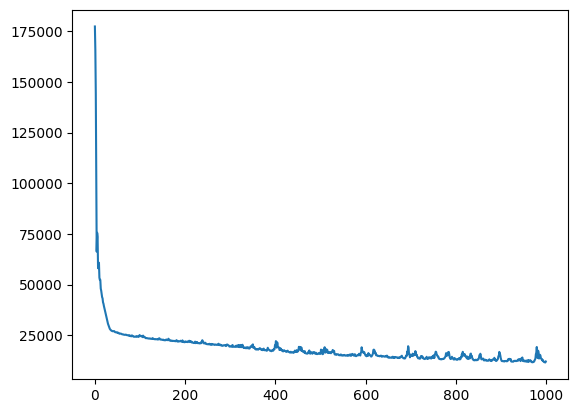

In [19]:
#convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
#use Pandas native plot method
history_df['loss'].plot();

In [24]:
previsoes = model.predict(X_test)
previsoes = pd.DataFrame(previsoes)
previsoes = previsoes.rename(columns={0:'SalePrice'})
previsoes_final = pd.concat([test_data.iloc[:, 0], previsoes], axis=1)
previsoes_final.head()

46/46 [==============================] - 0s 3ms/step


,Id,SalePrice
0,1461,123671.890625
1,1462,223078.812500
2,1463,185176.078125
3,1464,194548.718750
4,1465,174633.703125


In [25]:
previsoes_final.to_csv(r'C:\Users\Pichau\OneDrive\Área de Trabalho\Kaggle\Competitions\House Prices\Predict\previsoes_nn.csv',index=False)